In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D
from tensorflow.keras.layers import Flatten, Dense, Dropout

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# 텐서로 변환 (높이, 너비, 채널)
x_train = x_train.reshape(-1, 32, 32, 3)
x_test = x_test.reshape(-1, 32, 32, 3)

print(x_train.shape, x_test.shape)
print(y_train.shape, y_test.shape)

x_train = x_train.astype(np.float32) / 255.0
x_test = x_test.astype(np.float32) / 255.0

(50000, 32, 32, 3) (10000, 32, 32, 3)
(50000, 1) (10000, 1)


In [2]:
cnn = Sequential()

cnn.add(Conv2D(input_shape=(32,32,3), kernel_size=(3,3), filters=32, activation='relu'))
cnn.add(Conv2D(kernel_size=(3,3), filters=64, activation='relu'))
cnn.add(MaxPool2D(pool_size=(2, 2)))
cnn.add(Dropout(0.25))

cnn.add(Flatten())

cnn.add(Dense(128, activation='relu'))
cnn.add(Dropout(0.5))
cnn.add(Dense(10, activation='softmax'))

In [3]:
cnn.compile(optimizer=tf.keras.optimizers.Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

hist = cnn.fit(x_train, y_train, batch_size=128, epochs=30, validation_data=(x_test, y_test))

Epoch 1/30
391/391 [==============================] - 9s 15ms/step - loss: 1.6585 - accuracy: 0.3994 - val_loss: 1.2802 - val_accuracy: 0.5464
Epoch 2/30
391/391 [==============================] - 5s 12ms/step - loss: 1.3427 - accuracy: 0.5201 - val_loss: 1.1447 - val_accuracy: 0.5954
Epoch 3/30
391/391 [==============================] - 4s 11ms/step - loss: 1.2071 - accuracy: 0.5728 - val_loss: 1.0395 - val_accuracy: 0.6388
Epoch 4/30
391/391 [==============================] - 5s 13ms/step - loss: 1.1292 - accuracy: 0.6003 - val_loss: 0.9912 - val_accuracy: 0.6521
Epoch 5/30
391/391 [==============================] - 5s 12ms/step - loss: 1.0677 - accuracy: 0.6222 - val_loss: 0.9620 - val_accuracy: 0.6635
Epoch 6/30
391/391 [==============================] - 5s 12ms/step - loss: 1.0237 - accuracy: 0.6361 - val_loss: 0.9324 - val_accuracy: 0.6741
Epoch 7/30
391/391 [==============================] - 5s 13ms/step - loss: 0.9819 - accuracy: 0.6541 - val_loss: 0.9162 - val_accuracy: 0.6789

In [5]:
cnn.evaluate(x_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.9492 - accuracy: 0.7083


[0.9492247104644775, 0.708299994468689]

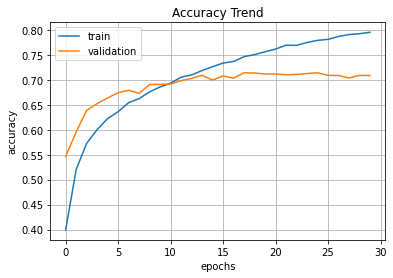

In [8]:
import matplotlib.pyplot as plt

plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Accuracy Trend')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['train', 'validation'], loc='best')
plt.grid()
plt.show()

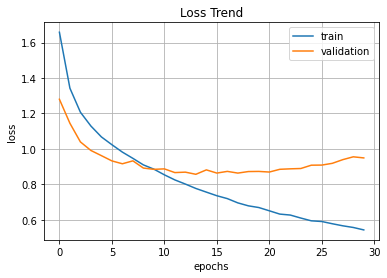

In [10]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Loss Trend')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['train', 'validation'], loc='best')
plt.grid()
plt.show()